# Agenda

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

>* ‘Unnamed 0’- Index of the dataset
>* Email_hash- Anonymised Personal Identifiable Information (PII)
>* Company_hash- Current employer of the learner
>* orgyear- Employment start date
>* CTC- Current CTC
>* Job_position- Job profile in the company
>* CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)


####Concept Used:
>* Manual Clustering
>* Unsupervised Clustering - K- means, Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
#from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/datasets/scaler_clustering.csv")
#pd.set_option('display.max_rows', None)
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
pd.reset_option("display.max_rows")

pd.reset_option("display.max_columns")

In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.shape

(205843, 7)

In [ ]:
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0])*100

Unnamed: 0           0.000000
company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [ ]:
#pd.set_option('display.max_rows', None)
df["company_hash"].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

In [ ]:
#pd.set_option('display.max_rows', None)
df["email_hash"].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

In [ ]:
#pd.set_option('display.max_rows', None)
df["job_position"].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [ ]:
import re
df['company_hash']=df['company_hash'].str.replace(r'[^A-Za-z ]+', '', regex=True).str.lower()
df['company_hash']=df['company_hash'].str.strip()



In [ ]:
df['company_hash'].nunique()

37207

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.dropna(subset = ["company_hash","orgyear"], inplace=True)

In [ ]:
(df.isna().sum()/df.shape[0])*100

Unnamed: 0           0.000000
company_hash         0.000000
email_hash           0.000000
orgyear              0.000000
ctc                  0.000000
job_position        25.524396
ctc_updated_year     0.000000
dtype: float64

In [ ]:
mask = df["company_hash"]==""

df=df[~mask]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205624 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205624 non-null  int64  
 1   company_hash      205624 non-null  object 
 2   email_hash        205624 non-null  object 
 3   orgyear           205624 non-null  float64
 4   ctc               205624 non-null  int64  
 5   job_position      153156 non-null  object 
 6   ctc_updated_year  205624 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.6+ MB


In [ ]:
job_positionfill = df.groupby(by='company_hash')["job_position"].agg(pd.Series.mode).to_frame().reset_index()
job_positionfill

,company_hash,job_position
0,a,Product Manager
1,a b onttr wgqu,Other
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other
3,a ntwy ogrhnxgzo ucn rna,Assistant
4,a ntwyzgrgsxto,Backend Engineer
...,...,...
37176,zz,Other
37177,zz wgzztwn mya,Other
37178,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
37179,zzgato,[]


In [ ]:
for i in range (len(job_positionfill["job_position"])):
  if (type(job_positionfill["job_position"][i]) == np.ndarray):
    if (len(job_positionfill["job_position"][i])>0):
      job_positionfill["job_position"][i]=job_positionfill["job_position"][i][0]
    else:
      job_positionfill["job_position"][i]="Other"
  else:
    continue

In [ ]:
job_positionfill

,company_hash,job_position
0,a,Product Manager
1,a b onttr wgqu,Other
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other
3,a ntwy ogrhnxgzo ucn rna,Assistant
4,a ntwyzgrgsxto,Backend Engineer
...,...,...
37176,zz,Other
37177,zz wgzztwn mya,Other
37178,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
37179,zzgato,Other


In [ ]:
df1=df.merge(job_positionfill,on="company_hash", how='left')

In [ ]:
df1["job_position_x"].fillna(df1["job_position_y"],inplace=True)


In [ ]:
df1["job_position_x"].nunique()

1017

In [ ]:
df1["job_position_x"]=df1["job_position_x"].str.lower().str.strip()

In [ ]:
df1["job_position_x"].nunique()

912

In [ ]:
(df1.isna().sum()/df1.shape[0])*100

Unnamed: 0          0.0
company_hash        0.0
email_hash          0.0
orgyear             0.0
ctc                 0.0
job_position_x      0.0
ctc_updated_year    0.0
job_position_y      0.0
dtype: float64

In [ ]:
#pd.set_option('display.max_rows', None)
df1["job_position_x"].value_counts()

backend engineer             73616
other                        30542
fullstack engineer           30140
frontend engineer            12493
engineering leadership        7210
                             ...  
senior web developer             1
pop engineer                     1
senior frontend developer        1
tsc                              1
azure data factory               1
Name: job_position_x, Length: 912, dtype: int64

In [ ]:
df1["job_position_x"] = df1["job_position_x"].replace(["na","no","no job","none","n","h","..",".","pune",".7","q","896651","x","91","14","n","7","737","7033771951"], "other")

In [ ]:
df1.drop(["Unnamed: 0","job_position_y"], axis=1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205624 entries, 0 to 205623
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205624 non-null  object 
 1   email_hash        205624 non-null  object 
 2   orgyear           205624 non-null  float64
 3   ctc               205624 non-null  int64  
 4   job_position_x    205624 non-null  object 
 5   ctc_updated_year  205624 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [ ]:
ctc_by_company = df.groupby(by='company_hash')["ctc"].mean().to_frame().reset_index()
ctc_by_company


,company_hash,ctc
0,a,900000.0
1,a b onttr wgqu,180000.0
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,463999.0
3,a ntwy ogrhnxgzo ucn rna,400000.0
4,a ntwyzgrgsxto,1234687.5
...,...,...
37176,zz,935000.0
37177,zz wgzztwn mya,23800.0
37178,zzb ztdnstz vacxogqj ucn rna,600000.0
37179,zzgato,130000.0


In [ ]:
df2=df1.merge(ctc_by_company,on="company_hash", how='left')

In [ ]:
df2.rename(columns = {'ctc_y':'mean_ctc'}, inplace = True)

In [ ]:
job_positionfill = df.groupby(by='company_hash')["job_position"].agg(pd.Series.mode).to_frame().reset_index()
job_positionfill

,company_hash,job_position
0,a,Product Manager
1,a b onttr wgqu,Other
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other
3,a ntwy ogrhnxgzo ucn rna,Assistant
4,a ntwyzgrgsxto,Backend Engineer
...,...,...
37176,zz,Other
37177,zz wgzztwn mya,Other
37178,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
37179,zzgato,[]


In [ ]:
def year1(orgyear,ctc_updated_year):
  if orgyear==0.0:
    return ctc_updated_year
  elif orgyear < ctc_updated_year:
    return ctc_updated_year - orgyear
  else:
    return orgyear - ctc_updated_year

In [ ]:
df2['orgyear'] = df2['orgyear'].astype(str).str[:4]

In [ ]:
df2['orgyear'] = df2['orgyear'].astype(float)

In [ ]:
df2["yrs_exp"] = df2.apply(lambda x:year1(x["orgyear"],x["ctc_updated_year"]),axis = 1)


In [ ]:
#pd.set_option('display.max_rows', None)
df2["yrs_exp"].value_counts()

1.0       29501
2.0       29211
3.0       26617
4.0       23147
5.0       19178
          ...  
1815.0        1
2015.0        1
44.0          1
51.0          1
1819.0        1
Name: yrs_exp, Length: 67, dtype: int64

In [ ]:
mask = df2["yrs_exp"]>31.0

df2=df2[~mask]


In [ ]:

#pd.set_option('display.max_rows', None)
df2["yrs_exp"].value_counts()

1.0     29501
2.0     29211
3.0     26617
4.0     23147
5.0     19178
6.0     15089
0.0     14252
7.0     11689
8.0      8659
9.0      6604
10.0     4858
11.0     3475
12.0     2642
13.0     2148
14.0     1862
15.0     1514
16.0     1188
17.0      885
18.0      683
19.0      595
20.0      538
21.0      334
22.0      239
23.0      159
24.0       98
26.0       82
30.0       76
25.0       76
28.0       50
27.0       45
29.0       40
31.0       10
Name: yrs_exp, dtype: int64

In [ ]:
def classification1(x,mean_ctc):
  if x <= mean_ctc:
    return 2
  else:
    return 1

In [ ]:
df2["Flag_company_mean"] = df2.apply(lambda x:classification1(x["ctc_x"],x["mean_ctc"]),axis = 1)


In [ ]:
g_ctc = df2.groupby(["company_hash","job_position_x","yrs_exp"])["ctc_x"].describe()

In [ ]:
df3 = df2.merge(g_ctc, on = ["company_hash","job_position_x","yrs_exp"],how = "left")

In [ ]:
df3

,company_hash,email_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,mean_ctc,yrs_exp,Flag_company_mean,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,1.115667e+06,4.0,2,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.00,1085000.0,1092500.00,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,2.197334e+06,1.0,2,2.0,4.599995e+05,1.414284e+04,449999.0,454999.25,459999.5,464999.75,470000.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,2.000000e+06,5.0,2,1.0,2.000000e+06,NaN,2000000.0,2000000.00,2000000.0,2000000.00,2000000.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,1.713929e+06,2.0,2,12.0,1.361667e+06,4.045386e+05,700000.0,1047500.00,1375000.0,1712500.00,1950000.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,9.400000e+05,2.0,1,2.0,1.000000e+06,5.656854e+05,600000.0,800000.00,1000000.0,1200000.00,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205539,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019.0,1.681941e+06,11.0,2,1.0,2.200000e+05,NaN,220000.0,220000.00,220000.0,220000.00,220000.0
205540,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020.0,2.119245e+06,3.0,2,16.0,1.141250e+06,4.916215e+05,500000.0,787500.00,1000000.0,1462500.00,2000000.0
205541,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,backend engineer,2021.0,1.404485e+06,0.0,2,8.0,7.732500e+05,2.593325e+05,300000.0,675000.00,743000.0,1000000.00,1100000.0
205542,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,frontend engineer,2019.0,5.537303e+06,0.0,2,278.0,3.988187e+06,1.623707e+07,10000.0,412500.00,800000.0,1400000.00,100000000.0


In [ ]:
df3.rename(columns = {'25%':'ctc_25_quatile','50%':'ctc_50_quantile','75%':'ctc_75_quatile'}, inplace = True)

In [ ]:
df3

,company_hash,email_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,mean_ctc,yrs_exp,Flag_company_mean,count,mean,std,min,ctc_25_quatile,ctc_50_quantile,ctc_75_quatile,max
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,1.115667e+06,4.0,2,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.00,1085000.0,1092500.00,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,2.197334e+06,1.0,2,2.0,4.599995e+05,1.414284e+04,449999.0,454999.25,459999.5,464999.75,470000.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,2.000000e+06,5.0,2,1.0,2.000000e+06,NaN,2000000.0,2000000.00,2000000.0,2000000.00,2000000.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,1.713929e+06,2.0,2,12.0,1.361667e+06,4.045386e+05,700000.0,1047500.00,1375000.0,1712500.00,1950000.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,9.400000e+05,2.0,1,2.0,1.000000e+06,5.656854e+05,600000.0,800000.00,1000000.0,1200000.00,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205539,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019.0,1.681941e+06,11.0,2,1.0,2.200000e+05,NaN,220000.0,220000.00,220000.0,220000.00,220000.0
205540,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020.0,2.119245e+06,3.0,2,16.0,1.141250e+06,4.916215e+05,500000.0,787500.00,1000000.0,1462500.00,2000000.0
205541,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,backend engineer,2021.0,1.404485e+06,0.0,2,8.0,7.732500e+05,2.593325e+05,300000.0,675000.00,743000.0,1000000.00,1100000.0
205542,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,frontend engineer,2019.0,5.537303e+06,0.0,2,278.0,3.988187e+06,1.623707e+07,10000.0,412500.00,800000.0,1400000.00,100000000.0


In [ ]:
def classification(x,ctc_25_quatile,ctc_50_quantile,ctc_75_quatile):
  if x < ctc_25_quatile:
    return 4
  elif x >= ctc_25_quatile and x <= ctc_50_quantile:
    return 3
  elif x >= ctc_50_quantile and x <= ctc_75_quatile:
    return 2
  elif  x >= ctc_75_quatile:
    return 1

In [ ]:
df3["Flag_salary_company_job_yrs"] = df3.apply(lambda x:classification(x["ctc_x"],x["ctc_25_quatile"],x["ctc_50_quantile"],x["ctc_75_quatile"]),axis = 1)


In [ ]:
df3["Flag_salary_company_job_yrs"].value_counts()

3    123654
1     31706
4     30674
2     19510
Name: Flag_salary_company_job_yrs, dtype: int64

In [ ]:
df3.drop(columns=['count','mean','std','min','ctc_25_quatile','ctc_50_quantile','ctc_75_quatile','max'],axis = 1,inplace=True)

In [ ]:
g_ctc = df3.groupby(["company_hash","job_position_x"])["ctc_x"].describe()

In [ ]:
df4 = df3.merge(g_ctc, on = ["company_hash","job_position_x"],how = "left")

In [ ]:
df4["Flag_salary_company_job"] = df4.apply(lambda x:classification(x["ctc_x"],x["25%"],x["50%"],x["75%"]),axis = 1)


In [ ]:
df4

,company_hash,email_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,mean_ctc,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,count,mean,std,min,25%,50%,75%,max,Flag_salary_company_job
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,1.115667e+06,4.0,2,1,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.00,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,2.197334e+06,1.0,2,4,25.0,9.882000e+05,4.874998e+05,300000.0,600000.00,850000.0,1380000.0,2000000.0,4
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,2.000000e+06,5.0,2,3,1.0,2.000000e+06,NaN,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,3
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,1.713929e+06,2.0,2,4,40.0,1.777750e+06,9.371520e+05,520000.0,1100000.00,1600000.0,2100000.0,4600000.0,4
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,9.400000e+05,2.0,1,1,4.0,8.100000e+05,3.988316e+05,540000.0,585000.00,650000.0,875000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205539,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019.0,1.681941e+06,11.0,2,3,17.0,1.681941e+06,1.281569e+06,60000.0,220000.00,2300000.0,2700000.0,3500000.0,3
205540,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020.0,2.119245e+06,3.0,2,4,64.0,2.273281e+06,9.146184e+06,400000.0,800000.00,1000000.0,1462500.0,74200000.0,4
205541,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,backend engineer,2021.0,1.404485e+06,0.0,2,3,100.0,1.393460e+06,7.431086e+05,300000.0,999999.75,1300000.0,1500000.0,4800000.0,4
205542,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,frontend engineer,2019.0,5.537303e+06,0.0,2,1,1067.0,5.566173e+06,2.137701e+07,7300.0,365000.00,800000.0,1500000.0,200000000.0,1


In [ ]:
df4.drop(columns=['count','mean','std','min','25%','50%','75%','max','mean_ctc'],axis = 1,inplace=True)

In [ ]:
df4.drop(columns=['email_hash'],axis = 1,inplace=True)

In [ ]:
df4

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,4.0,2,1,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,1.0,2,4,4
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,5.0,2,3,3
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,2.0,2,4,4
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,1
...,...,...,...,...,...,...,...,...,...
205539,vuurt xzw,2008.0,220000,other,2019.0,11.0,2,3,3
205540,husqvawgb,2017.0,500000,other,2020.0,3.0,2,4,4
205541,vwwgrxnt,2021.0,700000,backend engineer,2021.0,0.0,2,3,4
205542,zgn vuurxwvmrt,2019.0,5100000,frontend engineer,2019.0,0.0,2,1,1


In [ ]:
df4.duplicated().sum()

31825

In [ ]:
df4.drop_duplicates(inplace=True)


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173719 entries, 0 to 205543
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   company_hash                 173719 non-null  object 
 1   orgyear                      173719 non-null  float64
 2   ctc_x                        173719 non-null  int64  
 3   job_position_x               173719 non-null  object 
 4   ctc_updated_year             173719 non-null  float64
 5   yrs_exp                      173719 non-null  float64
 6   Flag_company_mean            173719 non-null  int64  
 7   Flag_salary_company_job_yrs  173719 non-null  int64  
 8   Flag_salary_company_job      173719 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 13.3+ MB


In [ ]:
df4.nunique()

company_hash                   37160
orgyear                           45
ctc_x                           3357
job_position_x                   895
ctc_updated_year                   7
yrs_exp                           32
Flag_company_mean                  2
Flag_salary_company_job_yrs        4
Flag_salary_company_job            4
dtype: int64

# outlier treatment

In [ ]:
df4 = df4.loc[((df4.ctc_x) > df4.ctc_x.quantile(0.02)) & ((df4.ctc_x) < df.ctc.quantile(0.98))]


In [ ]:
df4 = df4.loc[((df4.orgyear) > df4.orgyear.quantile(0.02)) & ((df4.orgyear) < df.ctc.quantile(0.98))]


## Insights

* Make new  flag column based on some conditons grouping by  company hash and job position and years of experience

* Dropped Duplicated values
*   maximum learners are from this comapny hash "nvnv wgzohrnvzwj otqcxwto"
*  maximum learners  having job position As backend engineers or full stack engineers
*  maximum learners are having equal to or less than 5 years of experience
*  There were lot of wring values in oryear column that i handled manually
  


# Manual Clustering

In [ ]:
df4["Flag_company_mean"].value_counts()

2    125133
1     37004
Name: Flag_company_mean, dtype: int64

In [ ]:
df4["Flag_salary_company_job"].value_counts()

3    75183
1    32221
4    30537
2    24196
Name: Flag_salary_company_job, dtype: int64

In [ ]:
df4["Flag_salary_company_job_yrs"].value_counts()

3    97306
1    26221
4    24896
2    13714
Name: Flag_salary_company_job_yrs, dtype: int64

# Top 10 employees (earning more than most of the employees in the company _ job_position years_exp) - Tier 1:

In [ ]:
df4.loc[df4['Flag_salary_company_job_yrs'] == 1].nlargest(n=10, columns=['ctc_x'])

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job,label
64717,0.005631,2010.0,5990000,0.032349,2019.0,9.0,1,1,1,1
126194,0.005088,2020.0,5980000,0.135805,2019.0,1.0,1,1,1,2
62666,0.002967,2014.0,5950000,0.332953,2017.0,3.0,1,1,1,2
71150,0.004527,2007.0,5950000,0.332953,2015.0,8.0,1,1,1,1
9394,0.009955,2014.0,5940000,0.135805,2020.0,6.0,1,1,1,2
1831,0.010226,2021.0,5900000,0.332953,2020.0,1.0,1,1,1,2
5390,0.012230,2014.0,5900000,0.038227,2020.0,6.0,1,1,1,2
5491,0.010226,2014.0,5900000,0.332953,2021.0,7.0,1,1,1,2
16885,0.010226,2021.0,5900000,0.016141,2020.0,1.0,1,1,1,2
24815,0.000407,2015.0,5900000,0.332953,2020.0,5.0,1,1,1,2


# Top 10 employees (earning more than most of the employees in the company _ job_position years_exp) - Tier 4:

In [ ]:
df4.loc[df4['Flag_salary_company_job_yrs'] == 4].nlargest(n=10, columns=['ctc_x'])

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job,label
175195,0.000919,2009.0,5800000,0.332953,2020.0,11.0,1,4,1,1
158448,0.010226,2012.0,5750000,0.003318,2017.0,5.0,1,4,1,1
145301,0.000253,2017.0,5700000,0.135805,2021.0,4.0,1,4,1,1
178087,0.003997,2013.0,5650000,0.032349,2021.0,8.0,1,4,1,1
202276,0.006778,2011.0,5600000,0.151594,2021.0,10.0,1,4,1,1
203860,0.001671,2009.0,5600000,0.032349,2020.0,11.0,1,4,2,1
130681,0.015604,2010.0,5500000,0.006383,2019.0,9.0,1,4,2,1
134690,0.000247,2007.0,5500000,0.332953,2019.0,12.0,1,4,1,1
140146,0.000999,2004.0,5500000,0.006316,2021.0,17.0,1,4,3,1
144255,0.000907,2012.0,5500000,0.032349,2019.0,7.0,1,4,4,1


# Top 10 employees (earning more than most of the employees in the company) -

In [ ]:
df4.loc[df4['Flag_company_mean'] == 1].nlargest(n=10, columns=['ctc_x'])

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job,label
64717,0.005631,2010.0,5990000,0.032349,2019.0,9.0,1,1,1,1
126194,0.005088,2020.0,5980000,0.135805,2019.0,1.0,1,1,1,2
47380,0.000204,2004.0,5950000,0.032349,2015.0,11.0,1,3,2,1
62666,0.002967,2014.0,5950000,0.332953,2017.0,3.0,1,1,1,2
71150,0.004527,2007.0,5950000,0.332953,2015.0,8.0,1,1,1,1
9394,0.009955,2014.0,5940000,0.135805,2020.0,6.0,1,1,1,2
1831,0.010226,2021.0,5900000,0.332953,2020.0,1.0,1,1,1,2
5390,0.012230,2014.0,5900000,0.038227,2020.0,6.0,1,1,1,2
5491,0.010226,2014.0,5900000,0.332953,2021.0,7.0,1,1,1,2
16885,0.010226,2021.0,5900000,0.016141,2020.0,1.0,1,1,1,2


# Univariate Analysis

[Text(0, 3, '2688'),
 Text(0, 3, '4927'),
 Text(0, 3, '6508'),
 Text(0, 3, '5961'),
 Text(0, 3, '57056'),
 Text(0, 3, '39602'),
 Text(0, 3, '45395')]

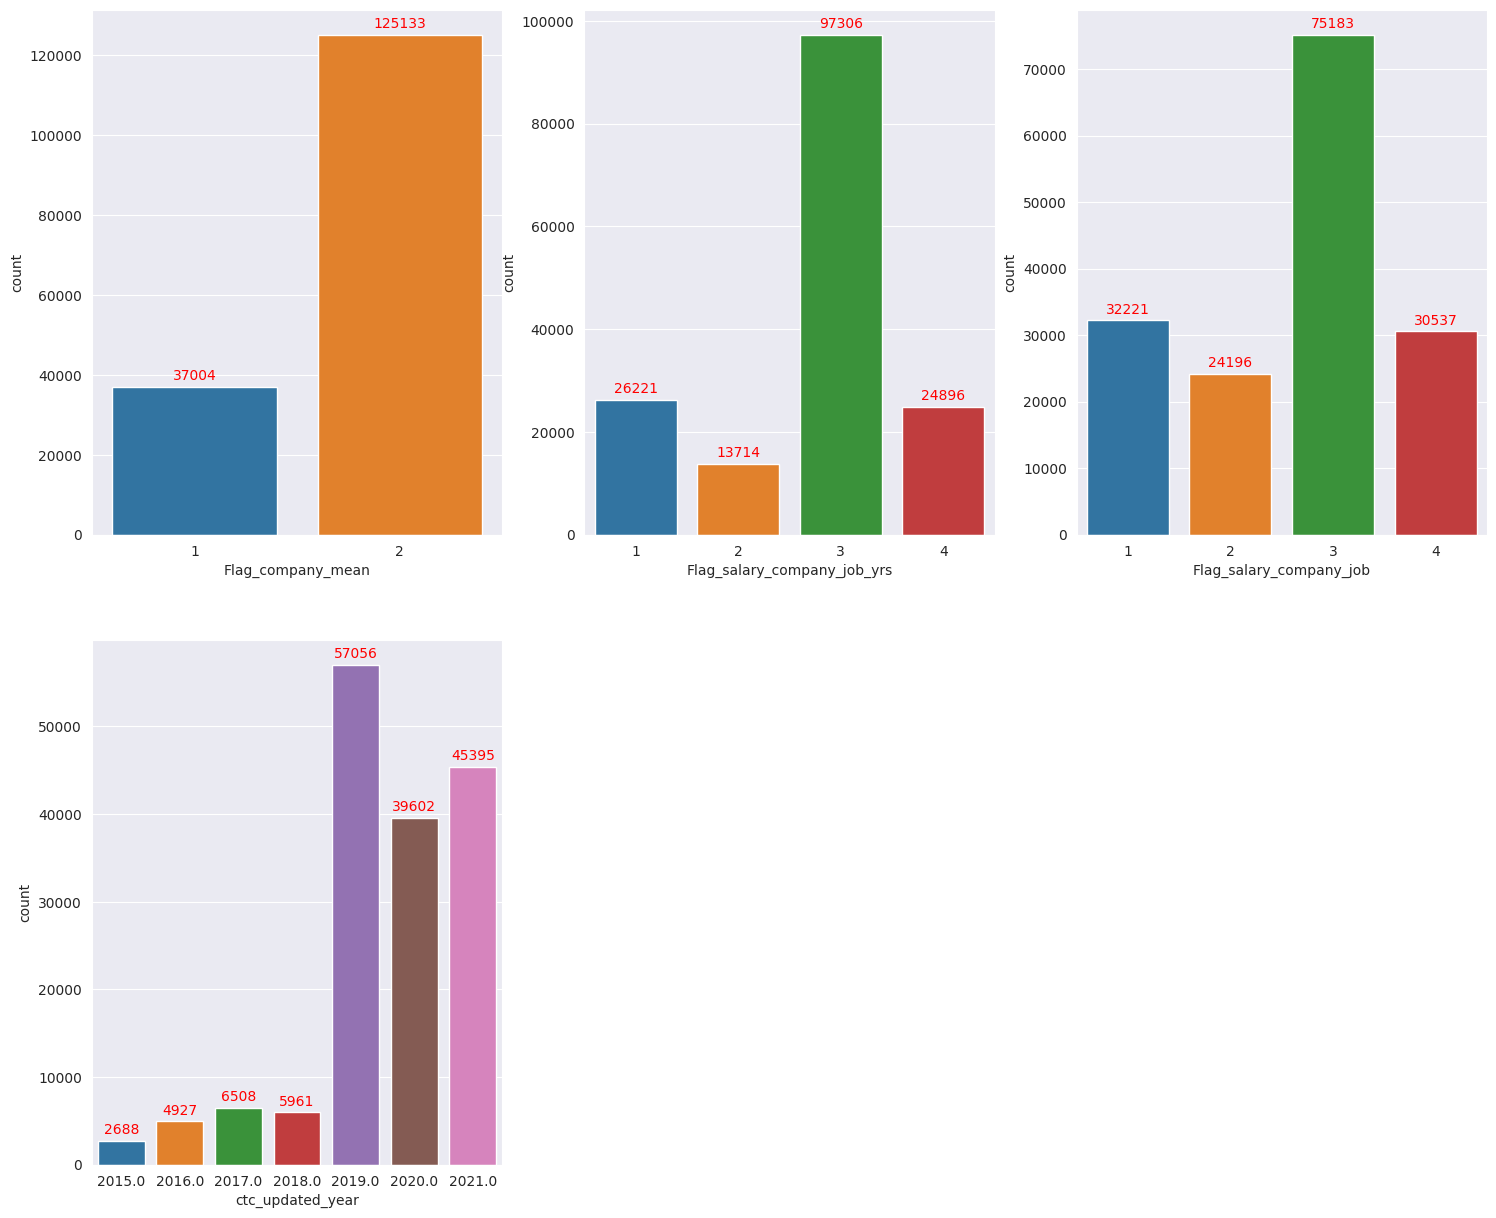

In [ ]:
fig=plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
ax=sns.countplot(x="Flag_company_mean",data = df4)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)


plt.subplot(2,3,2)
ax=sns.countplot(x="Flag_salary_company_job_yrs",data = df4)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,3)
ax=sns.countplot(x="Flag_salary_company_job",data = df4)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)

plt.subplot(2,3,4)
ax=sns.countplot(x="ctc_updated_year",data = df4)
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)


Text(0.5, 1.0, 'Top 10 ctc')

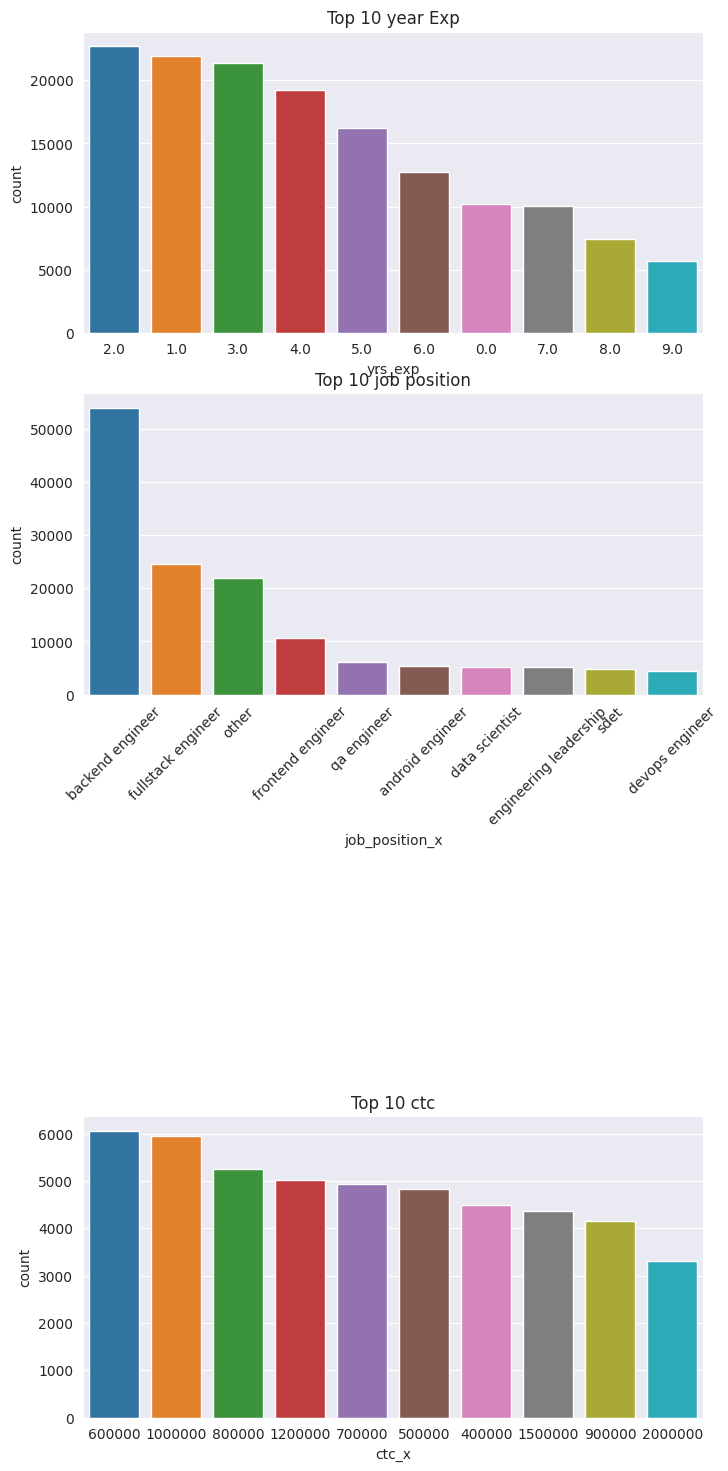

In [ ]:
fig=plt.figure(figsize=(8,18))

plt.subplot(4,1,1)
sns.set_style("darkgrid")
sns.countplot(x="yrs_exp",order = df4["yrs_exp"].value_counts().index[0:10],data = df4)
plt.title("Top 10 year Exp")


plt.subplot(4,1,2)
sns.set_style("darkgrid")
sns.countplot(x="job_position_x",order = df4["job_position_x"].value_counts().index[0:10],data = df4)
plt.title("Top 10 job position")
plt.xticks(rotation = 45)

plt.subplot(4,1,4)
sns.set_style("darkgrid")
sns.countplot(x="ctc_x",order = df4["ctc_x"].value_counts().index[0:10],data = df4)
plt.title("Top 10 ctc")


In [ ]:
df4["yrs_exp"].value_counts()

2.0     22702
1.0     21891
3.0     21377
4.0     19211
5.0     16182
6.0     12772
0.0     10185
7.0     10031
8.0      7437
9.0      5669
10.0     4108
11.0     2920
12.0     2281
13.0     1826
14.0     1522
15.0     1215
16.0      480
17.0      328
Name: yrs_exp, dtype: int64

## Insights

* There are only 22 % leaners that have more salary than avg salary in same company
* Mostly leaners belong to flag 3  ie. b/w quantile 50 and quantile 25

*  we have most learners that have their salary incremented after 2018
*  we have learners that have yrs exp equalt to 2 and 1 mainly fresher's
* There lot of backend and full stack engineers
*  Moslty learners salary ranges b/w 6 Lpa and  12 Lpa

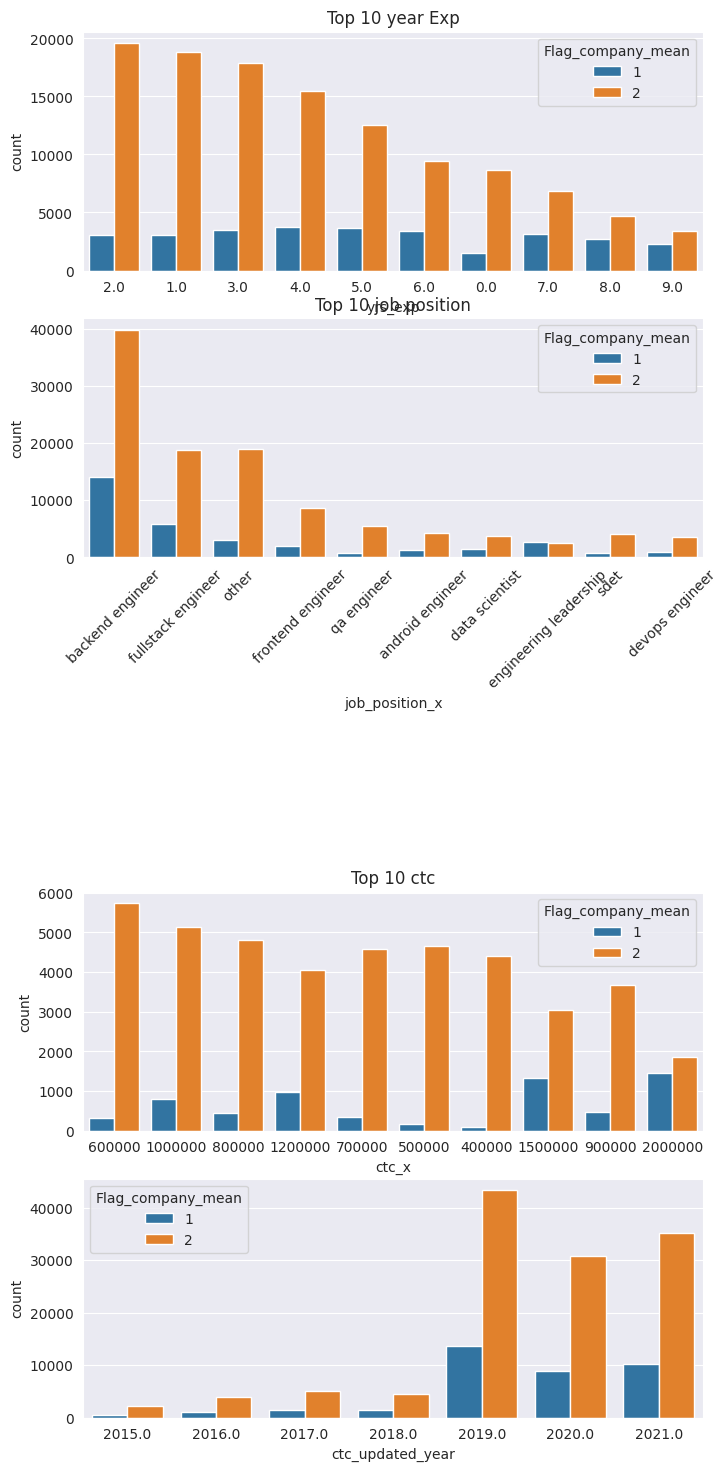

In [ ]:
fig=plt.figure(figsize=(8,18))

plt.subplot(5,1,1)
sns.set_style("darkgrid")
sns.countplot(x="yrs_exp",order = df4["yrs_exp"].value_counts().index[0:10], hue ="Flag_company_mean",data = df4)
plt.title("Top 10 year Exp")


plt.subplot(5,1,2)
sns.set_style("darkgrid")
sns.countplot(x="job_position_x",order = df4["job_position_x"].value_counts().index[0:10], hue ="Flag_company_mean",data = df4)
plt.title("Top 10 job position")
plt.xticks(rotation = 45)

plt.subplot(5,1,4)
sns.set_style("darkgrid")
sns.countplot(x="ctc_x",order = df4["ctc_x"].value_counts().index[0:10], hue ="Flag_company_mean",data = df4)
plt.title("Top 10 ctc")

plt.subplot(5,1,5)
ax=sns.countplot(x="ctc_updated_year",hue ="Flag_company_mean",data = df4)


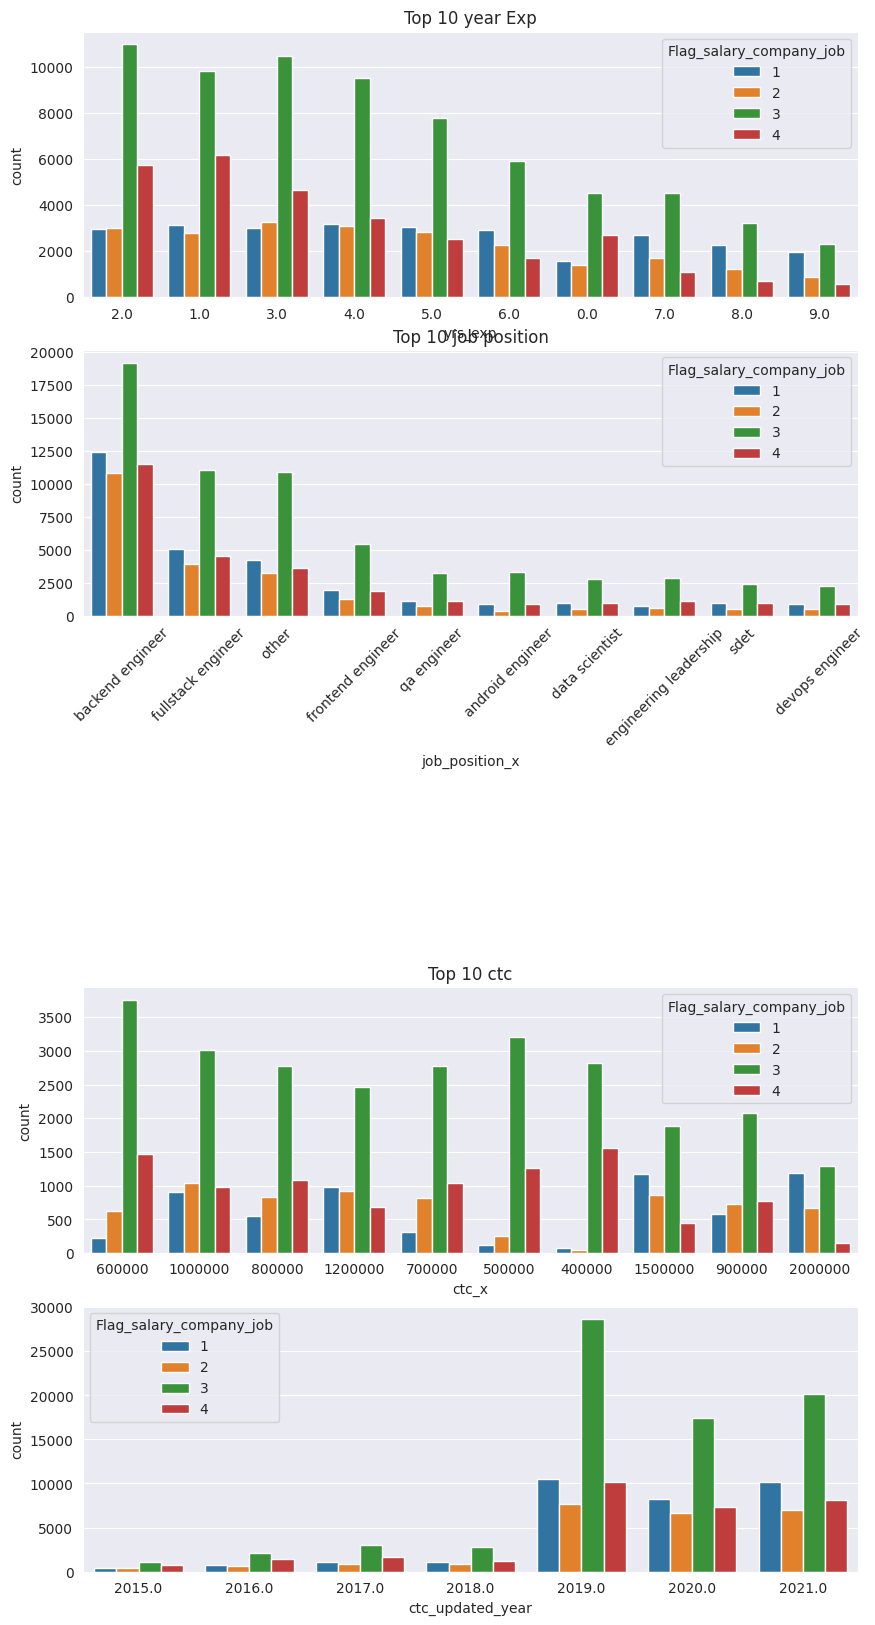

In [ ]:
fig=plt.figure(figsize=(10,20))

plt.subplot(5,1,1)
sns.set_style("darkgrid")
sns.countplot(x="yrs_exp",order = df4["yrs_exp"].value_counts().index[0:10], hue ="Flag_salary_company_job",data = df4)
plt.title("Top 10 year Exp")

plt.subplot(5,1,2)
sns.set_style("darkgrid")
sns.countplot(x="job_position_x",order = df4["job_position_x"].value_counts().index[0:10], hue ="Flag_salary_company_job",data = df4)
plt.title("Top 10 job position")
plt.xticks(rotation = 45)

plt.subplot(5,1,4)
sns.set_style("darkgrid")
sns.countplot(x="ctc_x",order = df4["ctc_x"].value_counts().index[0:10], hue ="Flag_salary_company_job",data = df4)
plt.title("Top 10 ctc")

plt.subplot(5,1,5)
ax=sns.countplot(x="ctc_updated_year",hue ="Flag_salary_company_job",data = df4)


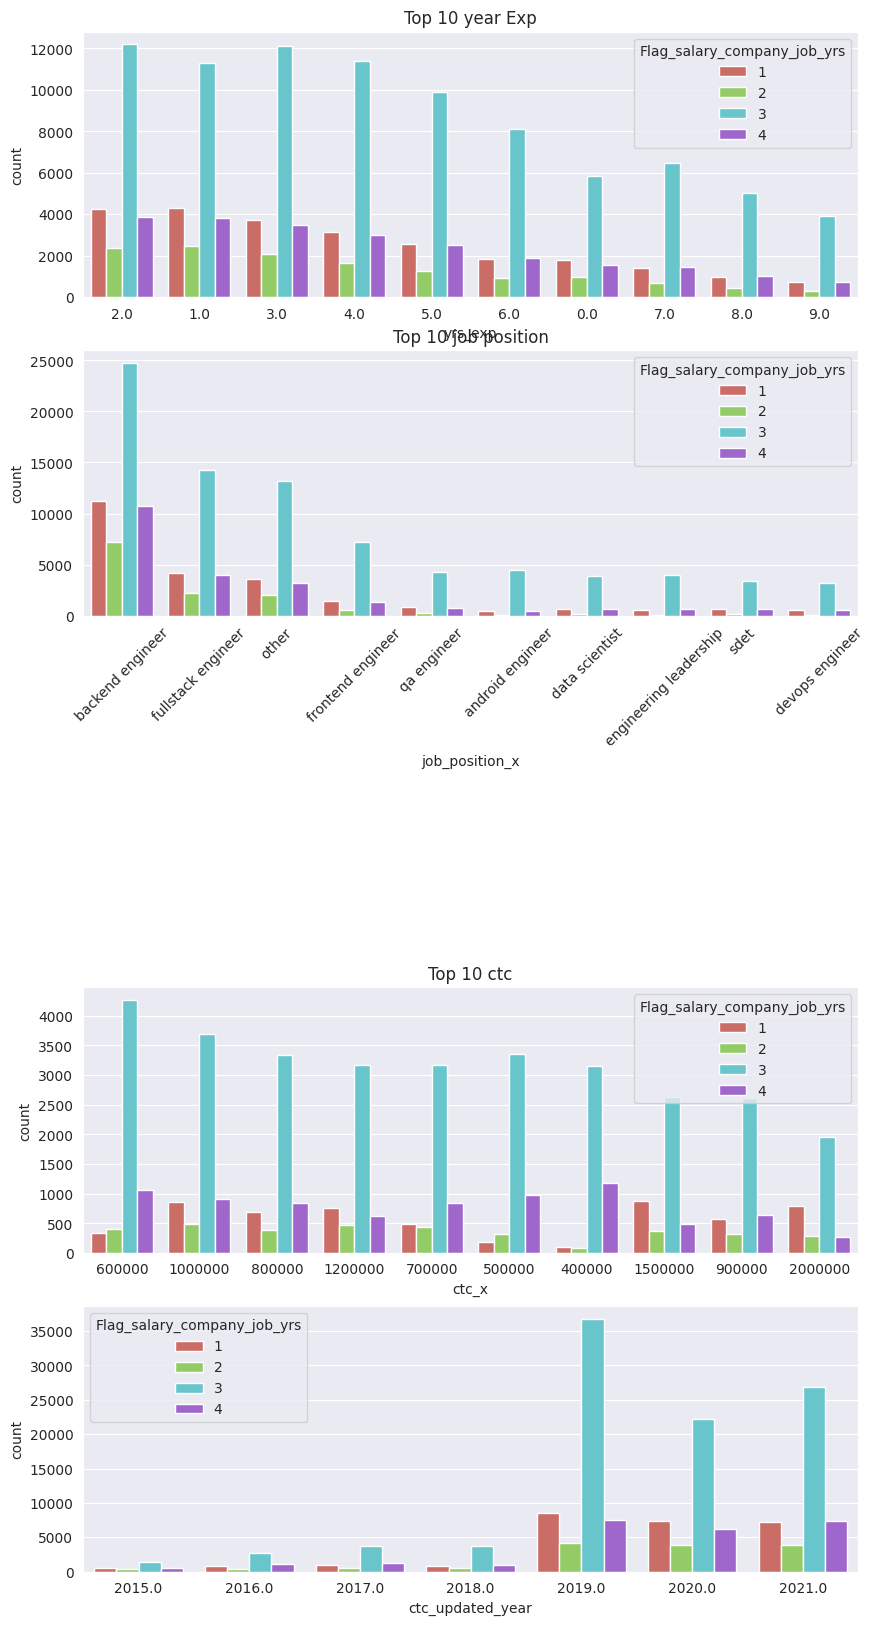

In [ ]:
fig=plt.figure(figsize=(10,20))

plt.subplot(5,1,1)
sns.set_style("darkgrid")
sns.countplot(x="yrs_exp",order = df4["yrs_exp"].value_counts().index[0:10], hue ="Flag_salary_company_job_yrs",data = df4,palette="hls")
plt.title("Top 10 year Exp")

plt.subplot(5,1,2)
sns.set_style("darkgrid")
sns.countplot(x="job_position_x",order = df4["job_position_x"].value_counts().index[0:10], hue ="Flag_salary_company_job_yrs",data = df4,palette="hls")
plt.title("Top 10 job position")
plt.xticks(rotation = 45)

plt.subplot(5,1,4)
sns.set_style("darkgrid")
sns.countplot(x="ctc_x",order = df4["ctc_x"].value_counts().index[0:10], hue ="Flag_salary_company_job_yrs",data = df4,palette="hls")
plt.title("Top 10 ctc")

plt.subplot(5,1,5)
ax=sns.countplot(x="ctc_updated_year",hue ="Flag_salary_company_job_yrs",data = df4,palette="hls")


<ipython-input-177-2e8c18fb21d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(method='spearman'), annot=True,cmap="BrBG_r")


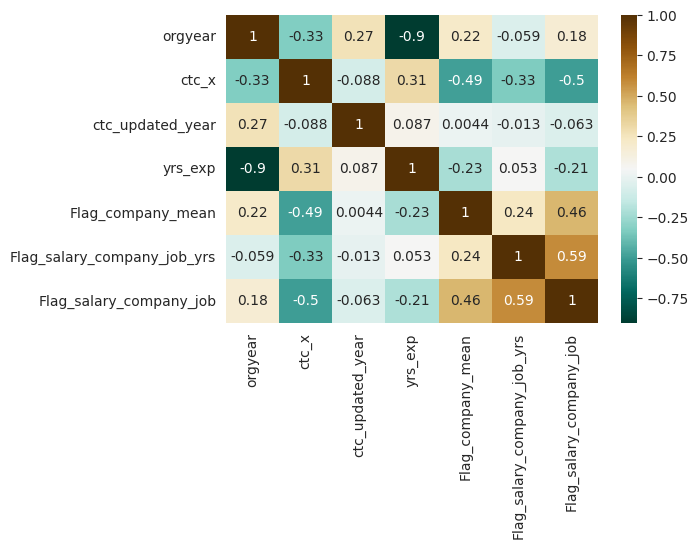

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df4.corr(method='spearman'), annot=True,cmap="BrBG_r")
plt.show()

## Insights

* Mostly all the learner having salary less than the mean / median salary
* Mostly leaners belong to flag 3  ie. b/w quantile 50 and quantile 25


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162137 entries, 0 to 205543
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   company_hash                 162137 non-null  object 
 1   orgyear                      162137 non-null  float64
 2   ctc_x                        162137 non-null  int64  
 3   job_position_x               162137 non-null  object 
 4   ctc_updated_year             162137 non-null  float64
 5   yrs_exp                      162137 non-null  float64
 6   Flag_company_mean            162137 non-null  int64  
 7   Flag_salary_company_job_yrs  162137 non-null  int64  
 8   Flag_salary_company_job      162137 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 12.4+ MB


In [ ]:
df4.nunique()

company_hash                   33918
orgyear                           27
ctc_x                           2382
job_position_x                   817
ctc_updated_year                   7
yrs_exp                           18
Flag_company_mean                  2
Flag_salary_company_job_yrs        4
Flag_salary_company_job            4
dtype: int64

In [ ]:
# Calculate frequency of each category
frequency_map1 = df4['company_hash'].value_counts(normalize=True).to_dict()
frequency_map2 = df4['job_position_x'].value_counts(normalize=True).to_dict()


# Map frequency values  to comapny_hash  and Job position
df4['company_hash'] = df4['company_hash'].map(frequency_map1)
df4['job_position_x'] = df4['job_position_x'].map(frequency_map2)



In [ ]:
df4["company_hash"].value_counts()

0.000006    24281
0.000012     7646
0.000019     4887
0.022685     3678
0.000025     3396
            ...  
0.000629      102
0.000617      100
0.000604       98
0.000598       97
0.000524       85
Name: company_hash, Length: 246, dtype: int64

In [ ]:
df4["job_position_x"].value_counts()

0.332953    53984
0.151594    24579
0.135805    22019
0.065377    10600
0.038227     6198
0.033737     5470
0.032584     5283
0.032349     5245
0.029882     4845
0.027464     4453
0.018867     3059
0.017707     2871
0.016517     2678
0.016141     2617
0.007013     1137
0.006988     1133
0.006383     1035
0.006316     1024
0.000006      591
0.003318      538
0.003263      529
0.003034      492
0.002011      326
0.000012      156
0.000019      126
0.000752      122
0.000678      110
0.000253       82
0.000025       76
0.000074       60
0.000068       55
0.000037       54
0.000167       54
0.000327       53
0.000093       45
0.000056       45
0.000271       44
0.000136       44
0.000031       40
0.000062       40
0.000105       34
0.000086       28
0.000043       28
0.000080       26
0.000148       24
0.000142       23
0.000123       20
0.000111       18
0.000099       16
0.000049        8
Name: job_position_x, dtype: int64

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162137 entries, 0 to 205543
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   company_hash                 162137 non-null  float64
 1   orgyear                      162137 non-null  float64
 2   ctc_x                        162137 non-null  int64  
 3   job_position_x               162137 non-null  float64
 4   ctc_updated_year             162137 non-null  float64
 5   yrs_exp                      162137 non-null  float64
 6   Flag_company_mean            162137 non-null  int64  
 7   Flag_salary_company_job_yrs  162137 non-null  int64  
 8   Flag_salary_company_job      162137 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 12.4 MB


#Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df4)
df_final = pd.DataFrame(scaler.transform(df4), columns=df4.columns, index=df4.index)

In [ ]:
df_final

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job
0,-0.528541,0.227572,-0.178747,-0.222686,0.348650,-0.136592,0.543799,-1.927304,-1.638325
1,-0.078081,0.783488,-0.846246,-0.099420,-0.392667,-1.021316,0.543799,1.385119,1.355590
2,-0.538524,-0.050386,0.745480,1.316465,0.348650,0.158315,0.543799,0.280978,0.357618
3,-0.458664,0.505530,-0.589515,1.316465,-0.392667,-0.726408,0.543799,1.385119,1.355590
4,-0.532285,0.505530,0.129328,-0.099420,-0.392667,-0.726408,-1.838915,-1.927304,-1.638325
...,...,...,...,...,...,...,...,...,...
205539,-0.519806,-1.996091,-1.082436,-0.222686,-0.392667,1.927763,0.543799,0.280978,0.357618
205540,-0.414990,0.505530,-0.794899,-0.222686,0.348650,-0.431500,0.543799,1.385119,1.355590
205541,-0.351352,1.617361,-0.589515,1.316465,1.089968,-1.316224,0.543799,0.280978,1.355590
205542,0.206421,1.061445,3.928930,-0.772525,-0.392667,-1.316224,0.543799,-1.927304,-1.638325


#Kmeans

In [ ]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,random_state=654)
    y_pred = kM.fit_predict(df_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_final)for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1459233.000000011,
 1155355.3467041105,
 1006802.2848000298,
 911066.7314252979,
 834634.548085904,
 775469.5757939643,
 720232.6998753259,
 672893.7476509784,
 634140.4915896505]

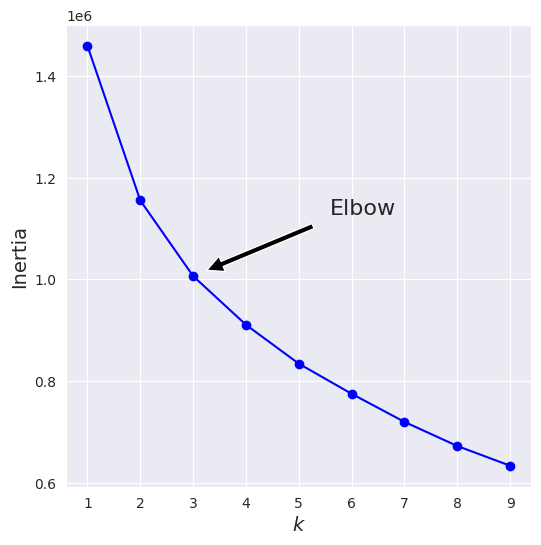

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',xy=(3, inertias[2]),xytext=(0.55, 0.55),textcoords='figure fraction',fontsize=16,arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

 * Acc to elblow method using  kmeans  we are going with n_clusters = 3


In [ ]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,random_state=654)
y_pred = kM.fit_predict(df_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = pd.DataFrame(df4, columns=df4.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters

,company_hash,orgyear,ctc_x,job_position_x,ctc_updated_year,yrs_exp,Flag_company_mean,Flag_salary_company_job_yrs,Flag_salary_company_job,label
0,0.000056,2016.0,1100000,0.135805,2020.0,4.0,2,1,1,2
1,0.002282,2018.0,449999,0.151594,2019.0,1.0,2,4,4,0
2,0.000006,2015.0,2000000,0.332953,2020.0,5.0,2,3,3,0
3,0.000401,2017.0,700000,0.332953,2019.0,2.0,2,4,4,0
4,0.000037,2017.0,1400000,0.151594,2019.0,2.0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
205539,0.000099,2008.0,220000,0.135805,2019.0,11.0,2,3,3,1
205540,0.000617,2017.0,500000,0.135805,2020.0,3.0,2,4,4,0
205541,0.000931,2021.0,700000,0.332953,2021.0,0.0,2,3,4,0
205542,0.003688,2019.0,5100000,0.065377,2019.0,0.0,2,1,1,2


<Axes: xlabel='orgyear', ylabel='ctc_x'>

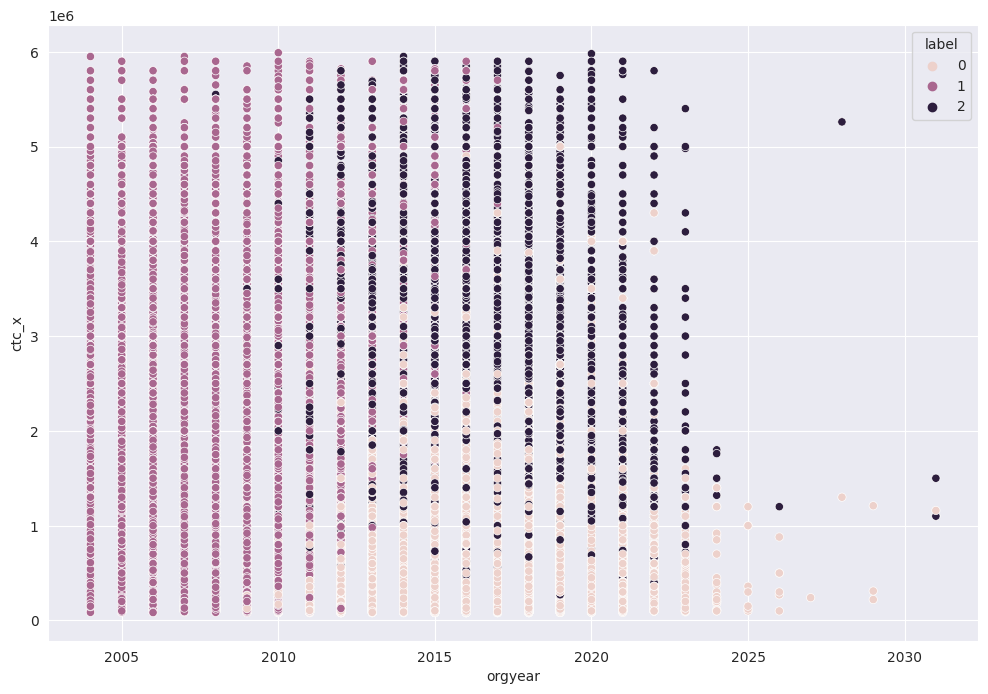

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=clusters, x="orgyear", y="ctc_x", hue="label")


>1.Based on above scatter plot , we can observe , a cluster of learners received CTC less than 30 LPA who joined after 2010.
>2.There's a group of learners who are very much experienced.
and also learners joined before 2010 receiving very high  CTC compared to others

<Axes: xlabel='label'>

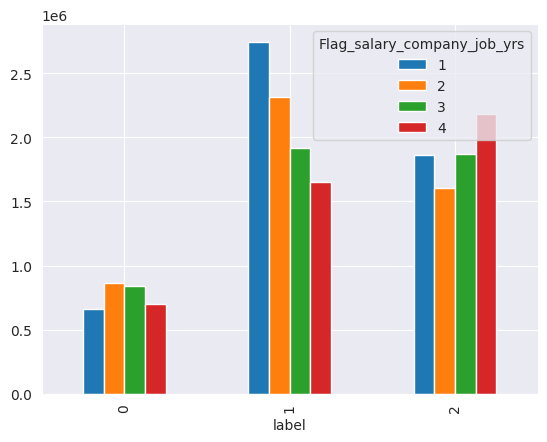

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["Flag_salary_company_job_yrs"],values=clusters["ctc_x"],aggfunc= np.mean
       ).plot(kind = "bar")

Based on k-Means Clustering algorithm output label 1 receiving very high CTC.


<Axes: xlabel='yrs_exp'>

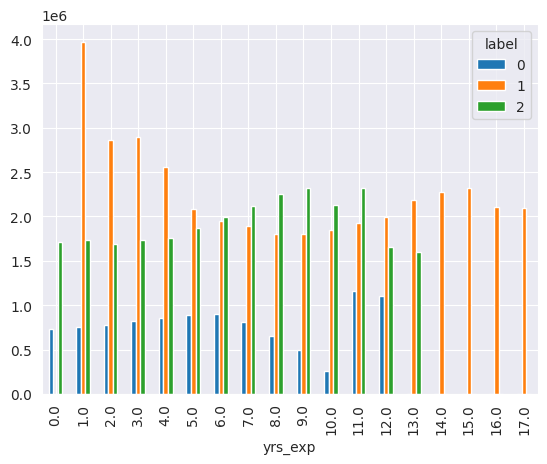

In [ ]:
pd.crosstab(columns = clusters["label"],index = clusters["yrs_exp"],values=clusters["ctc_x"],aggfunc= np.mean ).plot(kind = "bar")

## Insights

> 1. Cluster 0 does not have high experience emplyee's but also have low salary people
> 2. Cluster 1 does not have 0 exp emplyee's but salary is > than 1.5

> 3. Cluster 2 does not have high  emplyee's and  salary is > than label 1  


<Axes: xlabel='yrs_exp'>

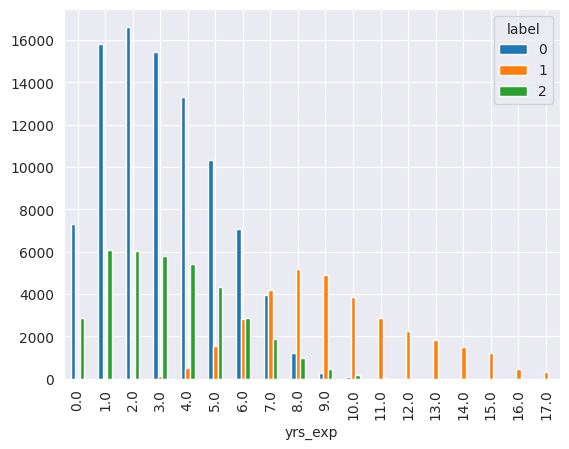

In [ ]:
pd.crosstab(columns = clusters["label"],index = clusters["yrs_exp"]).plot(kind = "bar")

## Insights

> 1. Cluster 0 does not have high experience emplyee's
> 2. Cluster 2 does not have freshers emplyee's
>

# Hierarchical Custering :

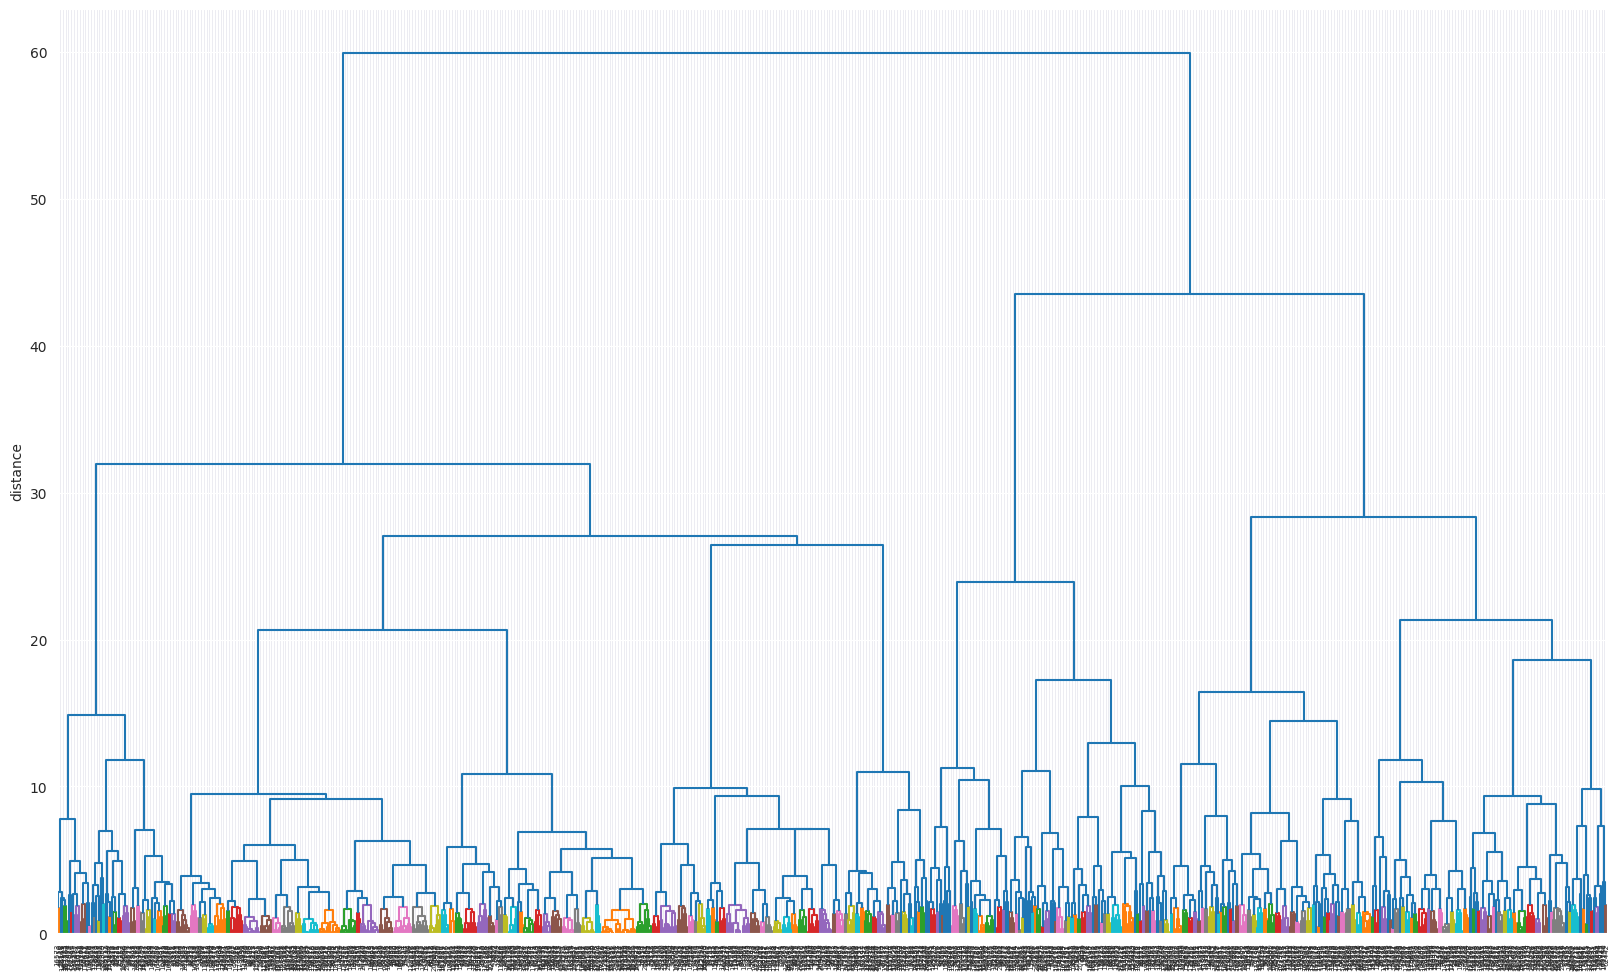

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = df_final.sample(1000)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()



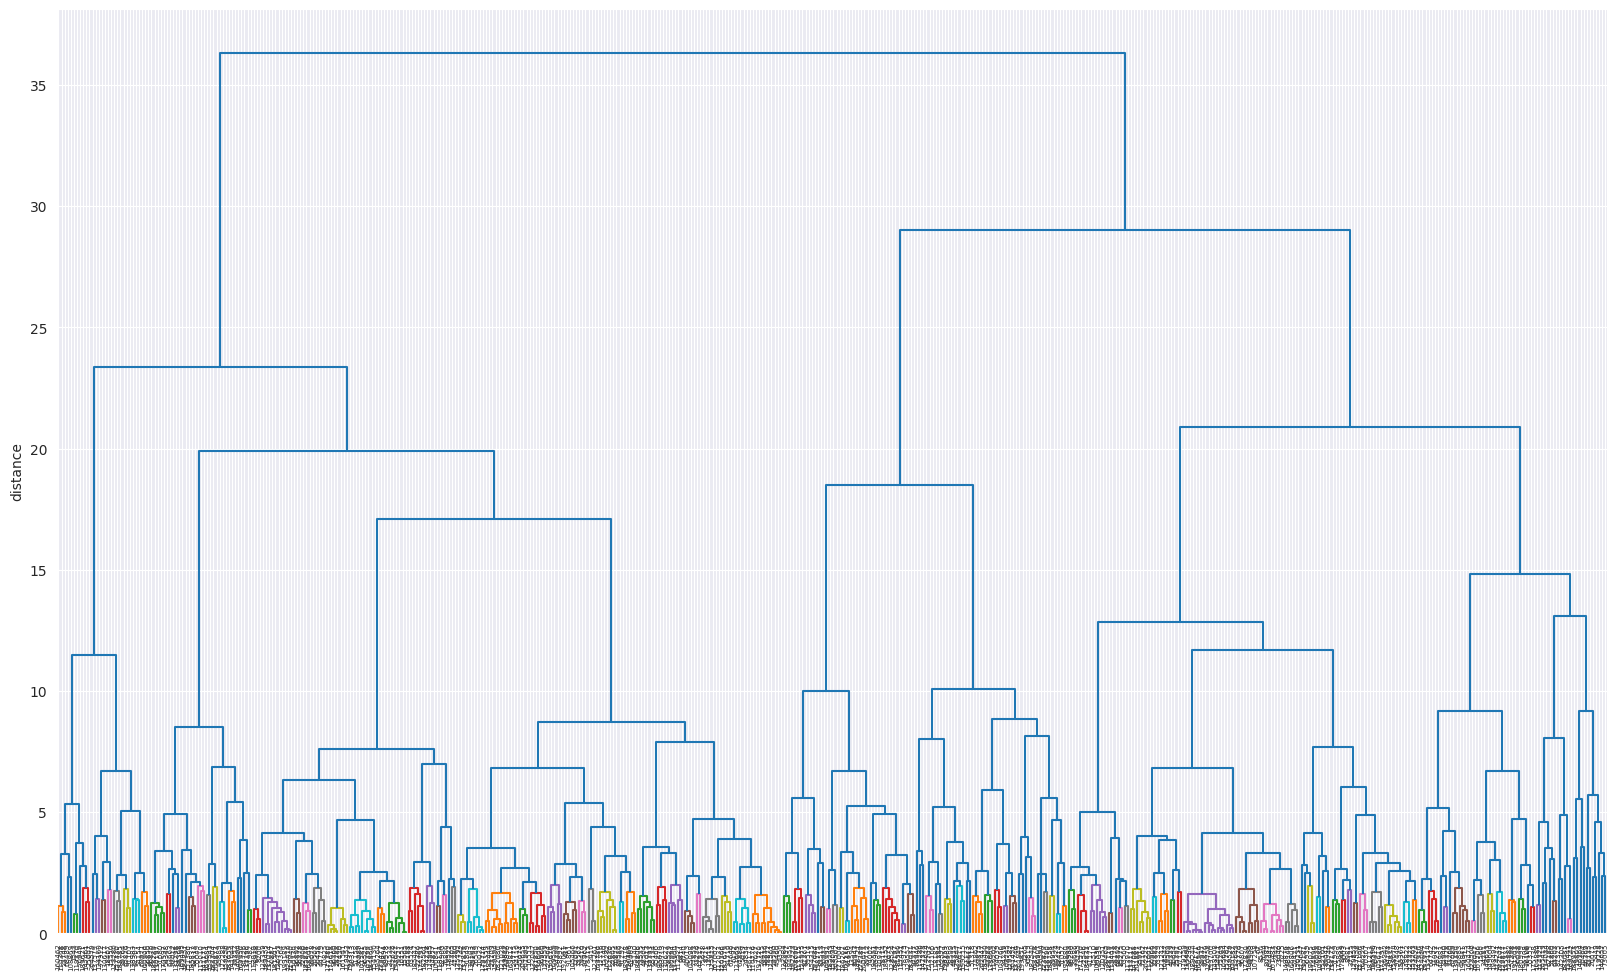

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = df_final.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()





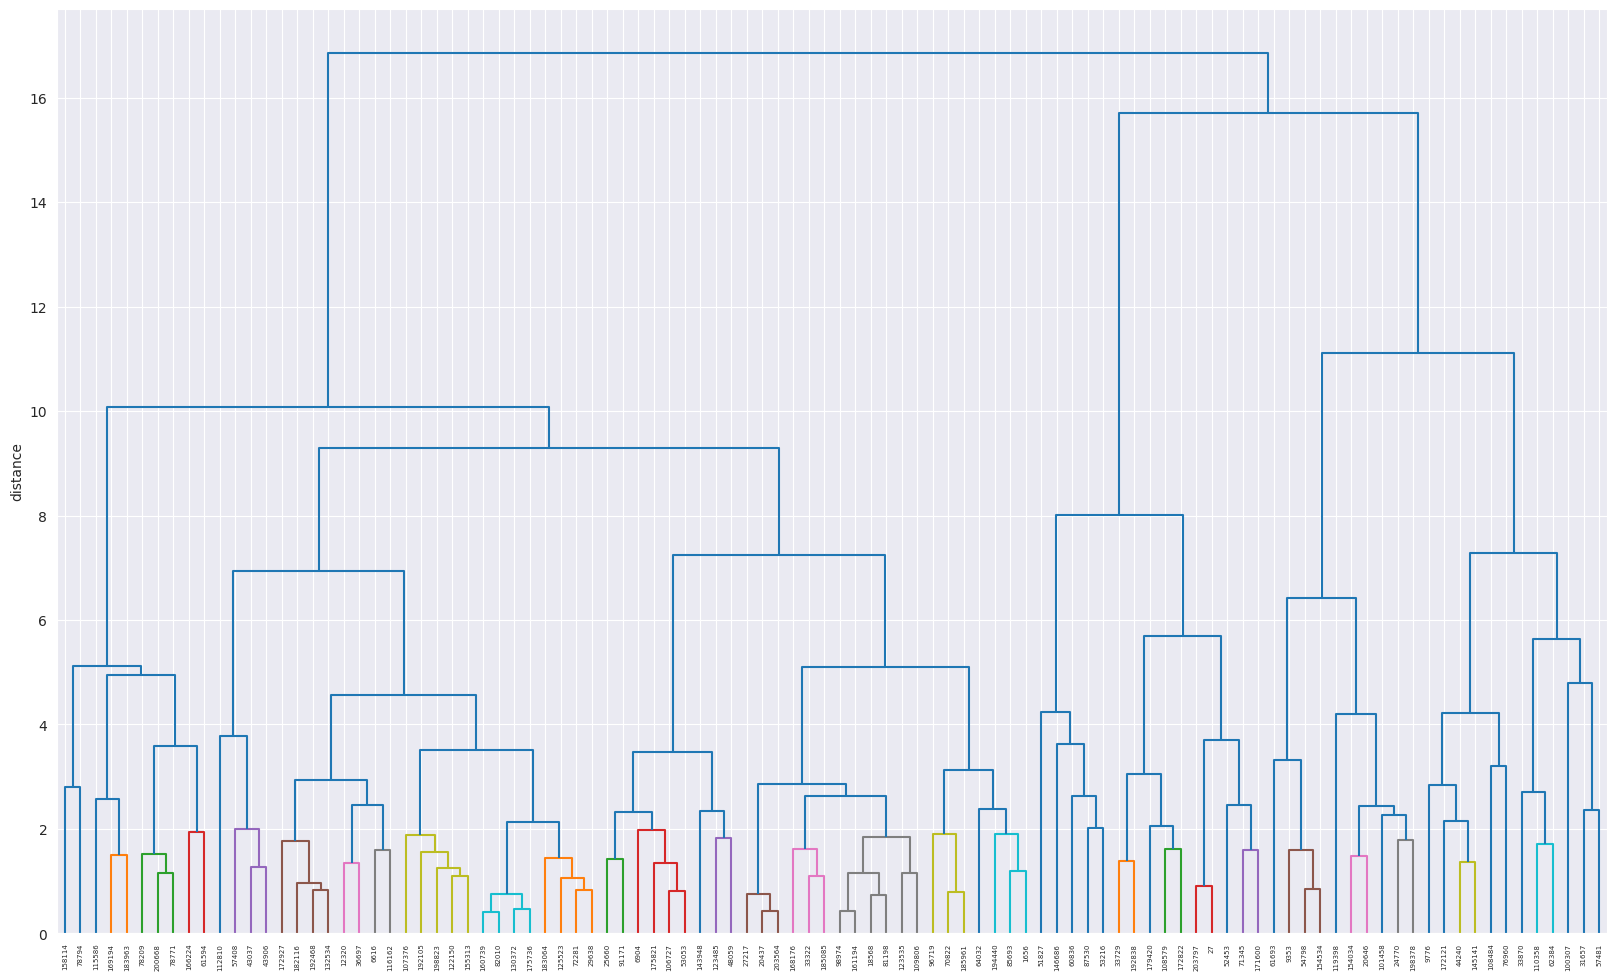

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = df_final.sample(100)
Z = sch.linkage(sample, method='ward')

#plt.figure(figsize=(.2, .2))

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

## Based on dendrogram , we can observe there are 4 or 5 clusters in the data based on similarity

# **Actionable Insights & Recommendations**
1. Maximum users have years of experience in the range of 3-10 years. Scaler can target the audience with experience 3 to 10 because mostly they were looking for a career change or upskilling.
2. In data, email_hash are repeating data and should store one email_hash for the individual users.
3. Maximum users have job_positions as other and backed_engineer, so scaler can target more on these 2 job_position.
4.With company_hash we can see the high-paying companies for the different job roles so the scaler can target the audience or advertise with these data insights.
5. In orgyear most of the years are invalid so the system should give an error if the user enters the wrong orgyear.
6.Scaler should show insights about the updated ctc and use this as a marketing strategy to bring in more audience